<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day06_randomforest_feature_importance/MachineLearning6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

## Loading and Scaling dataset

In [44]:
X = load_breast_cancer().data
y = load_breast_cancer().target

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest

A Random Forest is a powerful machine learning model that combines multiple decision trees to make predictions. It's an ensemble method, meaning it uses the results of several models (in this case, decision trees) to improve overall accuracy and reduce overfitting. Each decision tree within the forest is trained on a random subset of the data and considers only a random subset of features, which helps create more diverse and robust predictions.

In [47]:
model = RandomForestClassifier()

In [48]:
model = model.fit(X_train, y_train)

In [49]:
y_pred = model.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.9649122807017544

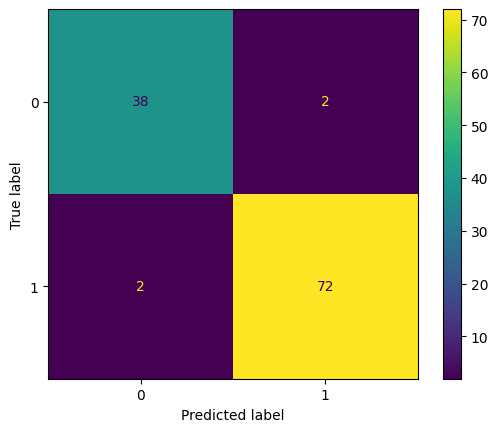

In [51]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



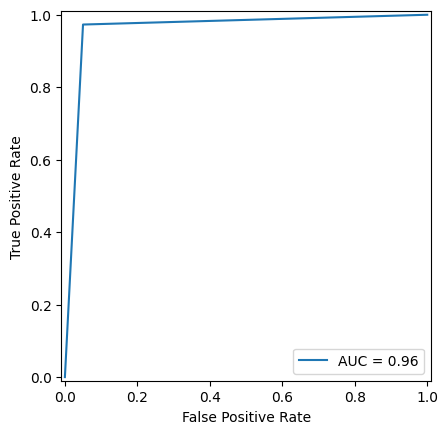

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In Random Forest, feature importance is calculated based on how much each feature reduces impurity (e.g., Gini impurity or entropy) across all the trees in the forest. Features that contribute more to better splits (more homogeneous child nodes) get higher importance scores.

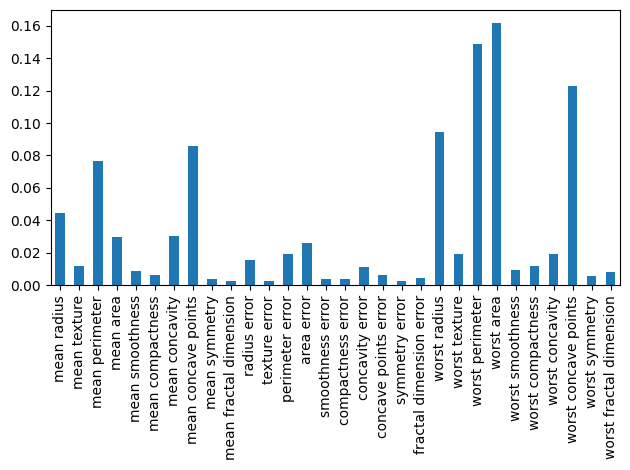

In [54]:
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=load_breast_cancer().feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. To find the best parameters for our random forest model we used grid search.

In [55]:
parameters = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
model = RandomForestClassifier()
model_gs = GridSearchCV(model, parameters)
model_gs.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]})

In [56]:
model_gs.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}

In [57]:
model_gs.best_score_

np.float64(0.9683900015525542)